In [1]:
import numpy as np
import scipy.linalg as lina

import scipy.stats as stat

import QuantumToolbox.operators as qOps
import QuantumToolbox.liouvillian as liou
import QuantumToolbox.states as states

import RMT_statistics.Modules.Distributions as RMTdist

import matplotlib.pyplot as plt

import Plotting.Functions as pltFncs
import Plotting.SimplePlots as sPlt

# Eigenvector Statistics of Kicked-top of Different Symmetries
---
    M Kus, J Mostowski and F Haake
    Journal of Physics A: Mathematical and General, Volume 21, Number 22
    https://iopscience.iop.org/article/10.1088/0305-4470/21/22/006
---

 ## 1.COE

Parameters, Hamiltonian, and the Unitaries

In [2]:
# Parameters
p_orthogonal = 1.7
j_orthogonal = 100
l_orthogonal = 6

# required operators
jz_orthogonal = qOps.Jz(j_orthogonal)
jy_orthogonal = qOps.Jy(j_orthogonal)
jzs_orthogonal = jz_orthogonal@jz_orthogonal

# Hamiltonians
h_orthogonal = p_orthogonal*jy_orthogonal
v_orthogonal = (l_orthogonal/(2*j_orthogonal + 1))*(jzs_orthogonal)

# Unitaries
U_h_orthogonal = liou.Liouvillian(h_orthogonal)
U_orthogonal = liou.Liouvillian(v_orthogonal)@U_h_orthogonal

# Eigenvectors of the U_o
vecs_orthogonal = lina.eig(U_orthogonal.A)[1]

# components of eigenvectors in the Jz basis
components_orthogonal = (np.abs(vecs_orthogonal.flatten()))**2

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


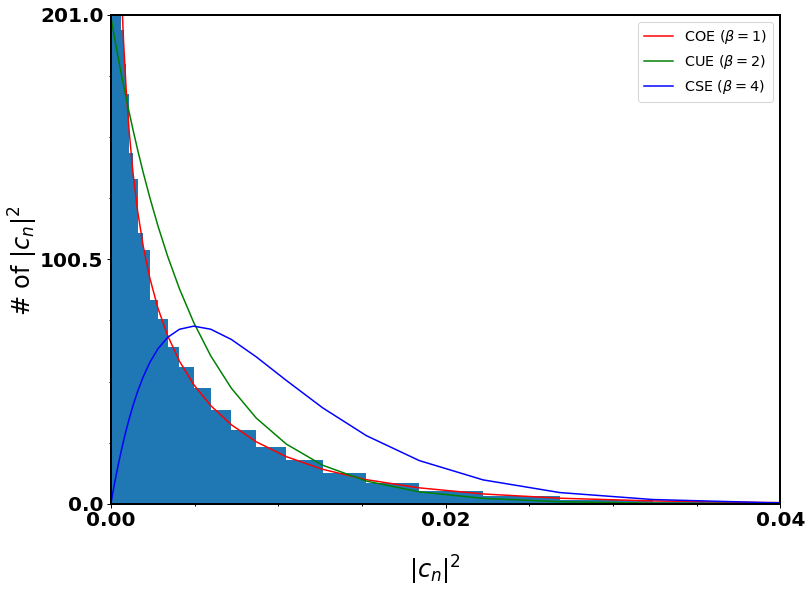

In [3]:
# Plotting
bins = np.logspace(-5, -1, num=50, base=10.0)

# quasi-continuous PDF and linear axes
sPlt.pltEig(components_orthogonal, Dims=((2*j_orthogonal) + 1), Bins=bins, Step=False, logScale=False)

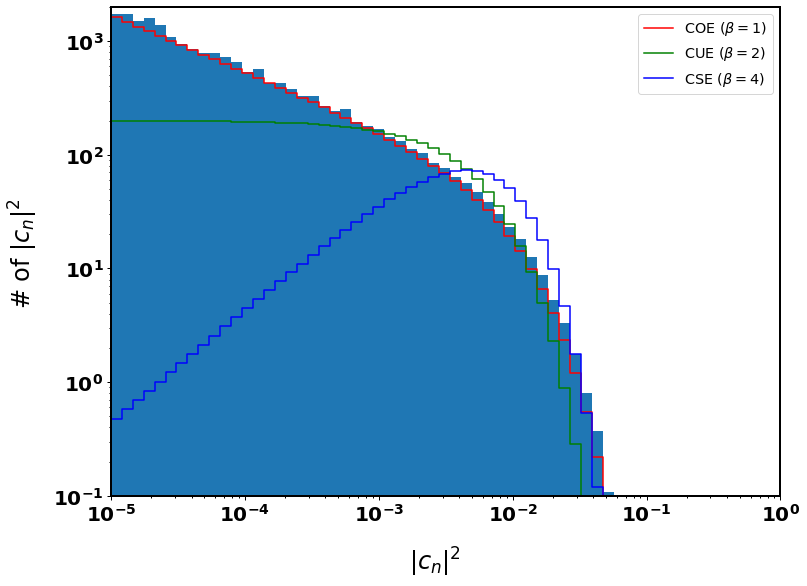

In [4]:
# discrete PDF and log axes
sPlt.pltEig(components_orthogonal, Dims=((2*j_orthogonal) + 1), Bins=bins, Step=True, logScale=True)

 ## 2.CUE

Parameters, Hamiltonian, and the Unitaries

In [5]:
# Parameters
p_unitary = 1.7
j_unitary = 100
k_unitary = 6
kp_unitary = 0.5

# required operators
jz_unitary = qOps.Jz(j_unitary)
jx_unitary = qOps.Jx(j_unitary)
jy_unitary = qOps.Jy(j_unitary)
jzs_unitary = jz_unitary@jz_unitary
jxs_unitary = jx_unitary@jx_unitary

# Hamiltonians
h_unitary = p_unitary*jy_unitary
v_unitary1 = (k_unitary/(2*j_unitary))*(jzs_unitary)
v_unitary2 = (kp_unitary/(2*j_unitary))*(jxs_unitary)

# Unitaries
U_h_unitary = liou.Liouvillian(h_unitary)
U_unitary1 = liou.Liouvillian(v_unitary1)@U_h_unitary
U_unitary = liou.Liouvillian(v_unitary2)@U_unitary1

# Eigenvectors of the U_u
vecs_unitary = lina.eig(U_unitary.toarray())[1]

# components of eigenvectors in the Jz basis
components_unitary = (np.abs(vecs_unitary.flatten()))**2

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


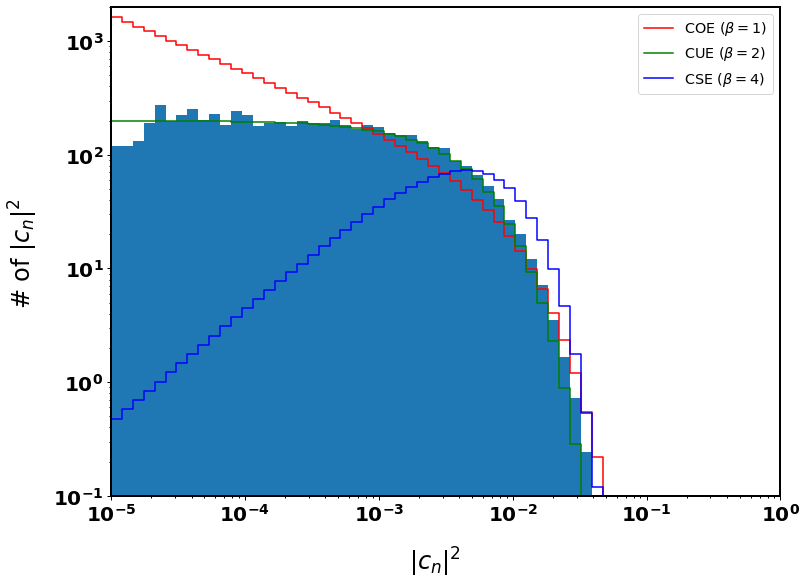

In [6]:
# discrete PDF and log axes
sPlt.pltEig(components_unitary, Dims=((2*j_unitary) + 1), Bins=bins, Step=True, logScale=True)

 ## 3.CSE

Parameters, Hamiltonian, and the Unitaries

In [7]:
# Parameters
p_symplectic = 2.5
j_symplectic = 399.5
k_symplectic = 2.5
kp_symplectic = 2
kpp_symplectic = 3

# required operators
jz_symplectic = qOps.Jz(j_symplectic)
jy_symplectic = qOps.Jy(j_symplectic)
jx_symplectic = qOps.Jx(j_symplectic)
jzs_symplectic = jz_symplectic@jz_symplectic

# Hamiltonians
h_symplectic = (p_symplectic/j_symplectic)*jzs_symplectic
v_symplectic = (k_symplectic/j_symplectic)*(jzs_symplectic + kp_symplectic*(jx_symplectic@jz_symplectic + jz_symplectic@jx_symplectic) + kpp_symplectic*(jx_symplectic@jy_symplectic + jy_symplectic@jx_symplectic))

# Unitaries
U_h_symplectic = liou.Liouvillian(h_symplectic)
U_symplectic = liou.Liouvillian(v_symplectic)@U_h_symplectic

# Eigenvectors of the U_s
vecs_symplectic = lina.eig(U_symplectic.toarray())[1]

# components of eigenvectors in the Jz basis & taking the degeneracy into account
components_symplectic = []
for i_symplectic in range(len(vecs_symplectic)):
    el_symplectic = 0
    for k_symplectic in range(int(len(vecs_symplectic)/2)-2):
        p1_symplectic = (np.abs(vecs_symplectic[:,i_symplectic][el_symplectic]))**2
        p2_symplectic = (np.abs(vecs_symplectic[:,i_symplectic][el_symplectic+1]))**2
        el_symplectic += 2
        components_symplectic.append(p1_symplectic+p2_symplectic)

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


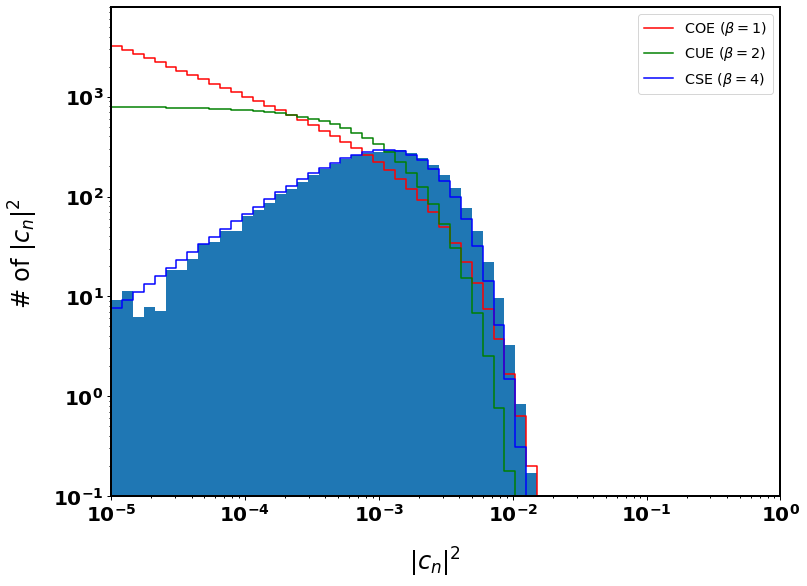

In [8]:
# discrete PDF and log axes
sPlt.pltEig(components_symplectic, Dims=((2*j_symplectic) + 1), Bins=bins, Step=True, logScale=True)

# Eigenvector Statistics for Digital Ising Simulation 
---
    L. M. Sieberer, T. Olsacher, A. Elben, M. Heyl, P. Hauke, F. Haake, and P. Zoller
    npj Quantum Information volume 5, Article number: 78 (2019)
    https://www.nature.com/articles/s41534-019-0192-5
---
This digital quantum simulation maps to kicked-top, and the goal below is to find j value at which system is sensibly chaotic. <br/>

In [9]:

def IsingDS(jv_ising, symp=False, chi=False):
    # parameters
    h_x_ising = 0.1
    j_x_ising = 0.7
    h_z_ising = 0.3

    # Trotter step size
    tau_ising = 5

    # required operators
    jz_ising = qOps.Jz(jv_ising)
    jx_ising = qOps.Jx(jv_ising)
    jzs_ising = jz_ising @ jz_ising
    jxs_ising = jx_ising @ jx_ising

    # Hamiltonians
    Ham_x_ising = ( (h_x_ising*jx_ising) + ( (j_x_ising*jxs_ising)/( (2*jv_ising) + 1) ) )
    Ham_z_ising = ( (h_z_ising*jz_ising) + ( (1/( (2*jv_ising) + 1) ) * jzs_ising) ) 

    #Unitaries
    U_x_ising = liou.Liouvillian(tau_ising * Ham_x_ising)
    U_z_ising = liou.Liouvillian(tau_ising * Ham_z_ising)
    U_t_ising = U_z_ising @ U_x_ising

    # Eigenvectors
    vecs_ising = lina.eig(U_t_ising.toarray())[1]


    # components of eigenvectors in the Jz basis
    components_ising = []
    if symp == True:
        if chi == False:
            el_ising = 0
            for i_ising in range(int(len(vecs_ising)/2)):
                p1_ising = (np.abs(vecs_ising[el_ising].flatten()))**2
                p2_ising = (np.abs(vecs_ising[el_ising+1].flatten()))**2
                el_ising += 2
                comps.append(sum(p1_ising+p2_ising))
        elif chi == True:
            for i_ising in range(len(vecs_ising)):
                el_ising = 0
                for k_ising in range(int(len(vecs_ising)/2)-2):
                    p1_ising = (np.abs(vecs_ising[:,i_ising][el_ising]))**2
                    p2_ising = (np.abs(vecs_ising[:,i_ising][el_ising+1]))**2
                    el_ising += 2
                    components.append(p1_ising+p2_ising)
    else:
        if chi == False:
            components_ising = (np.abs(vecs_ising.flatten()))**2
        elif chi == True:
            for ind1_ising in range(len(vecs_ising)):
                components_ising.append((np.abs(vecs_ising[ind1_ising].flatten()))**2)

    return components_ising

In [10]:
def jInterval(jmin, jmax, logScale, xlim=1):
    fig = plt.figure(figsize=(12, 9))
    fig.text(0.5, 0.01, r'$|c_n|^2$', ha='center', fontsize=24)
    fig.text(0.005, 0.5, r'# of $|c_n|^2$', va='center', rotation='vertical', fontsize=24)

    axGrids = pltFncs.grid(2,2)
    jlist = np.arange(jmin,jmax,0.5)
    
    for ind12 in range(len(jlist)):
        components_Interval = IsingDS(jlist[ind12])
        sPlt.pltEig(components_Interval, Dims=((2*jlist[ind12]) + 1), Step=False, logScale=logScale, ax=axGrids[ind12], Legend=False, xlim=xlim)
    plt.show()

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


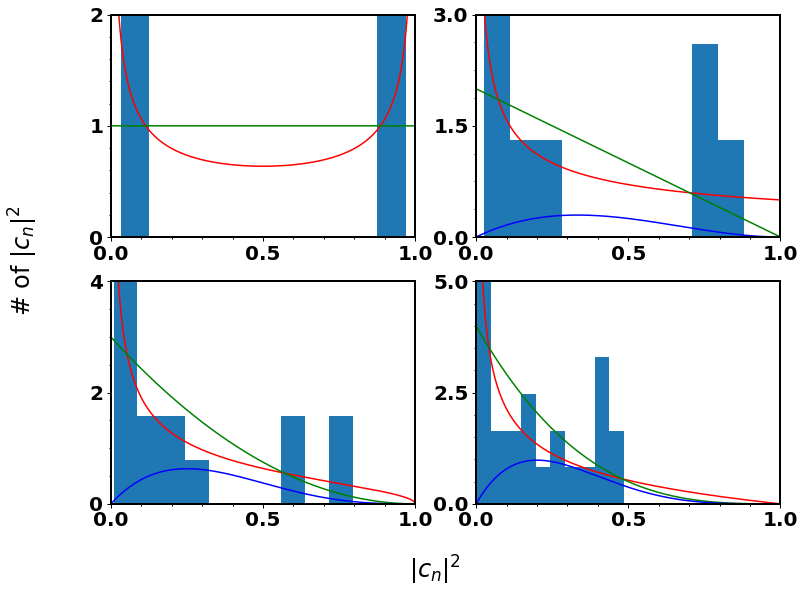

In [11]:
jInterval(0.5, 2.5, False)

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


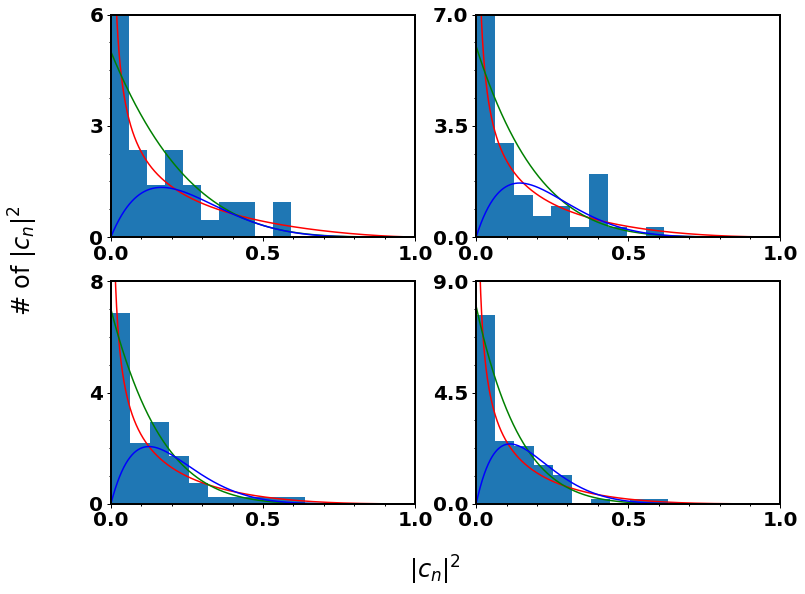

In [12]:
jInterval(2.5, 4.5, False)

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


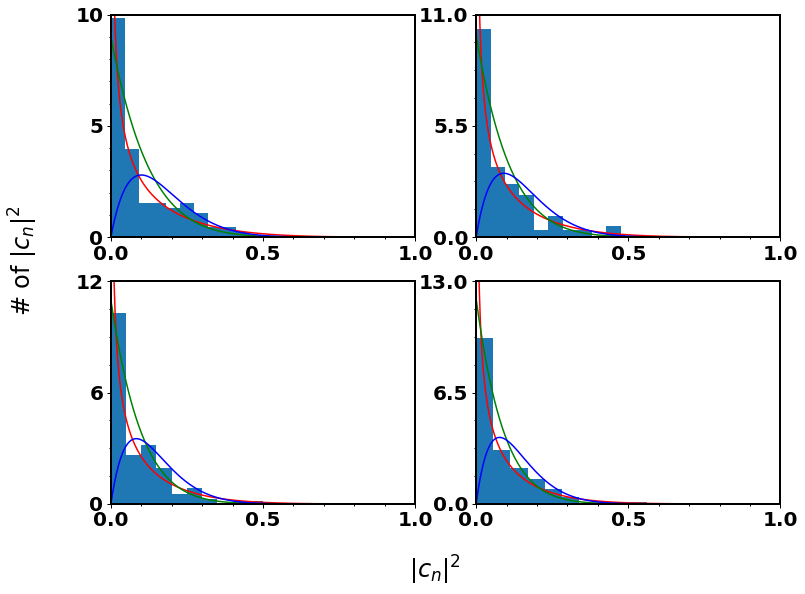

In [13]:
jInterval(4.5, 6.5, False)

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


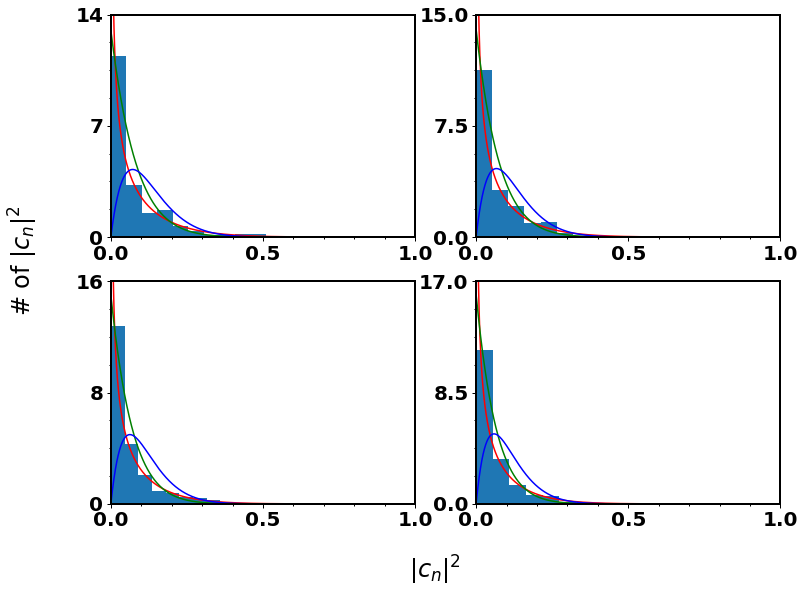

In [14]:
jInterval(6.5, 8.5, False)

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


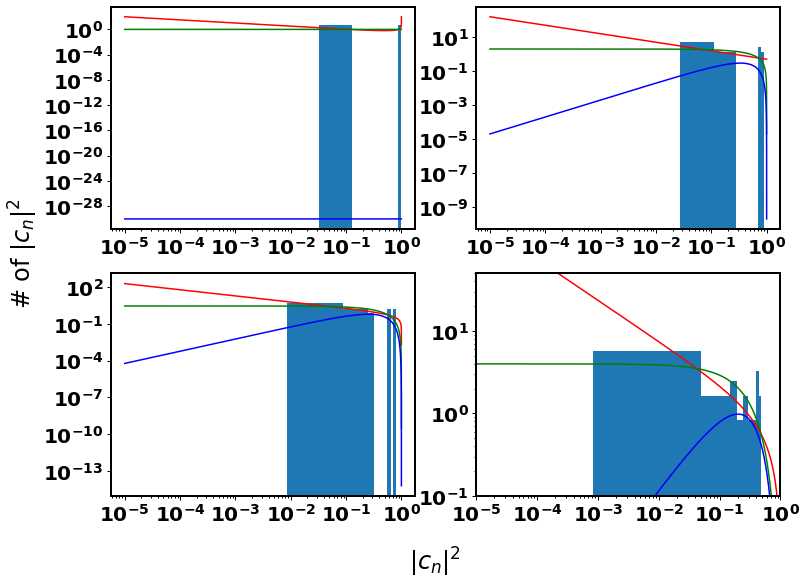

In [15]:
jInterval(0.5, 2.5, True)

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


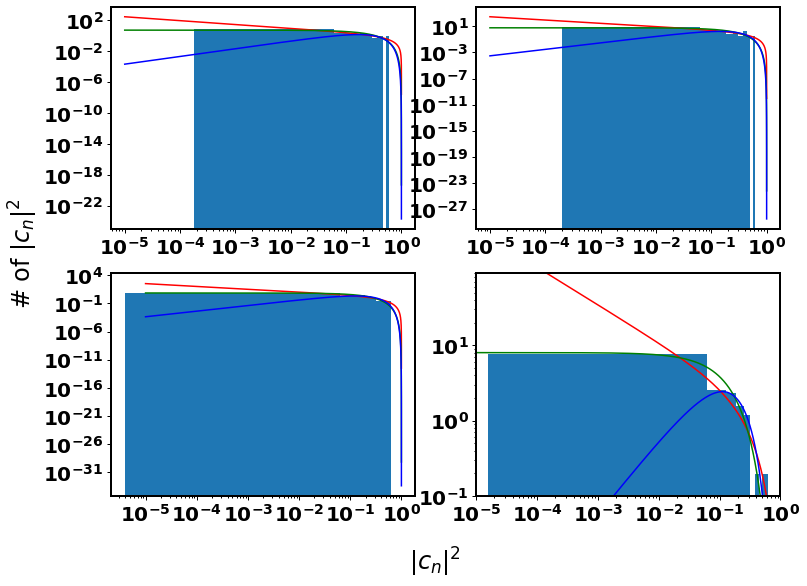

In [16]:
jInterval(2.5, 4.5, True)

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


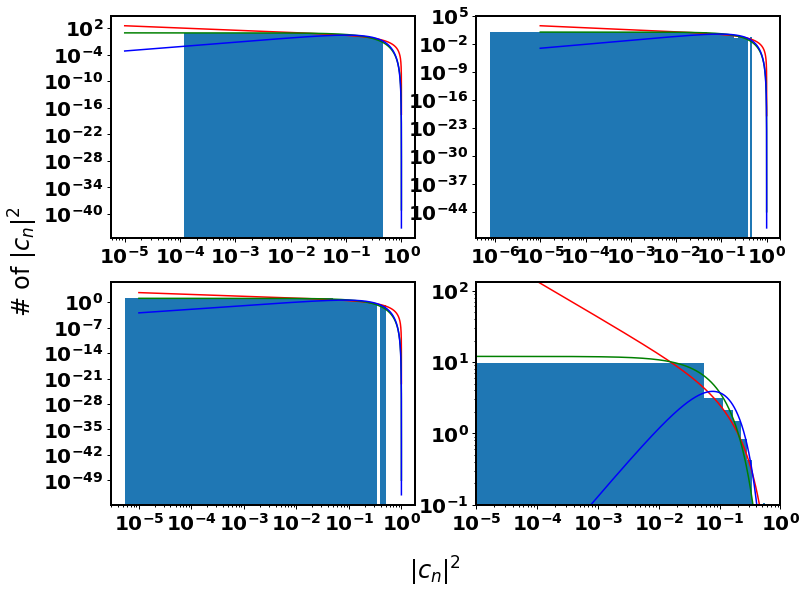

In [17]:
jInterval(4.5, 6.5, True)

/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/cahitkargi/opt/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


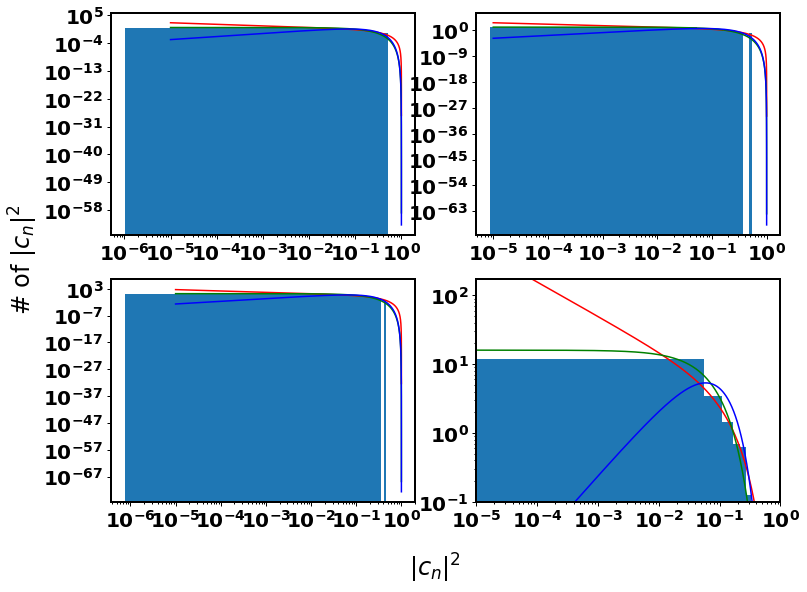

In [18]:
jInterval(6.5, 8.5, True)